###Importing necessary libraries

In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

###Message Signal

In [2]:
C_t0 = 0.15
C_l1 = C_t0/3
C_l2 = (2 * C_t0) / 3
list_t = []
list_m_t = []
list_i_m_t = []
for i in range(1500):
    t = i / 10000
    if 0 <= t < C_l1:
        m_t = 1
    elif C_l1 <= t < C_l2:
        m_t = -2
    else:
        m_t = 0
    i_m_t = m_t * t
    list_t.append(t)
    list_m_t.append(m_t)
    list_i_m_t.append(i_m_t)
msg_signal = pd.DataFrame({'Timestep t': list_t, 'Message Signal m(t)': list_m_t, 'Integral of Message Signal': list_i_m_t}) 

###Plotting the message signal

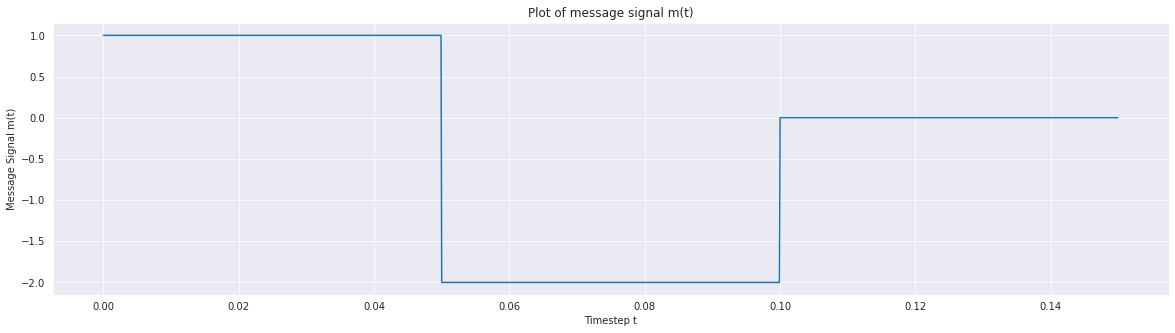

In [3]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = 'Timestep t', y = 'Message Signal m(t)', data = msg_signal)
plt.title('Plot of message signal m(t)')
plt.show()

###Plotting the integral of the message signal

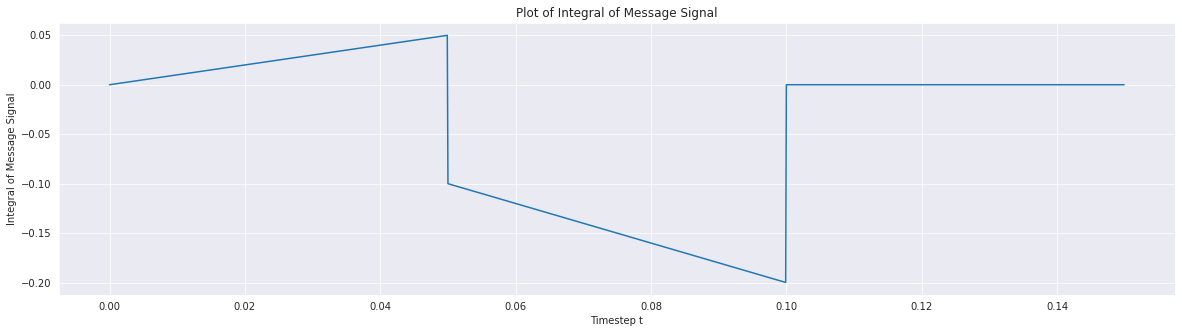

In [4]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = 'Timestep t', y = 'Integral of Message Signal', data = msg_signal)
plt.title('Plot of Integral of Message Signal')
plt.show()

###Frequency Modulated Signal

In [ ]:
def integral_function(t):
    if 0 <= t < C_l1:
        m_t = 1
    elif C_l1 <= t < C_l2:
        m_t = -2
    else:
        m_t = 0
    return m_t

list_t = []
list_u_t = []

for i in range(1500):
    t = i / 10000
    a =  2 * np.pi * 200 * t
    b0 = scipy.integrate.quad(integral_function, np.NINF, t)
    b = 2 * np.pi * 50 * b0[0]
    u_t = np.cos(a+b)
    list_t.append(t)
    list_u_t.append(u_t)

fm_signal = pd.DataFrame({'Timestep t': list_t, 'FM Signal': list_u_t})

###Plot of Frequency Modulated Signal

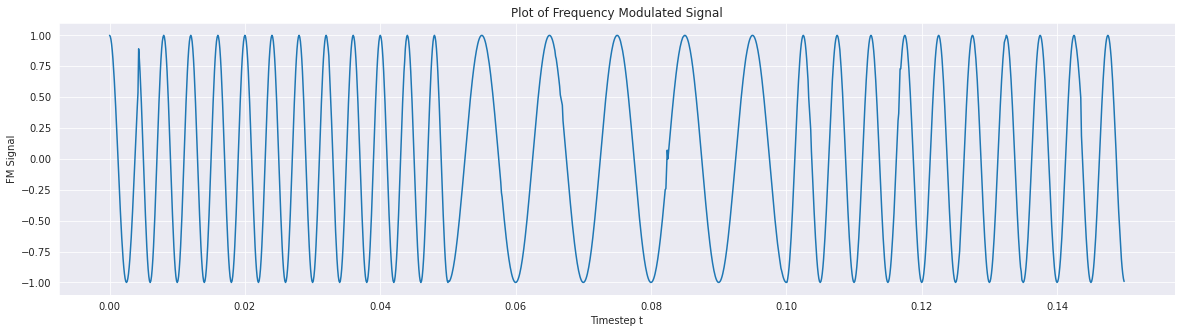

In [6]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = 'Timestep t', y = 'FM Signal', data = fm_signal)
plt.title('Plot of Frequency Modulated Signal')
plt.show()

###Frequency Spectrum of Message Signal

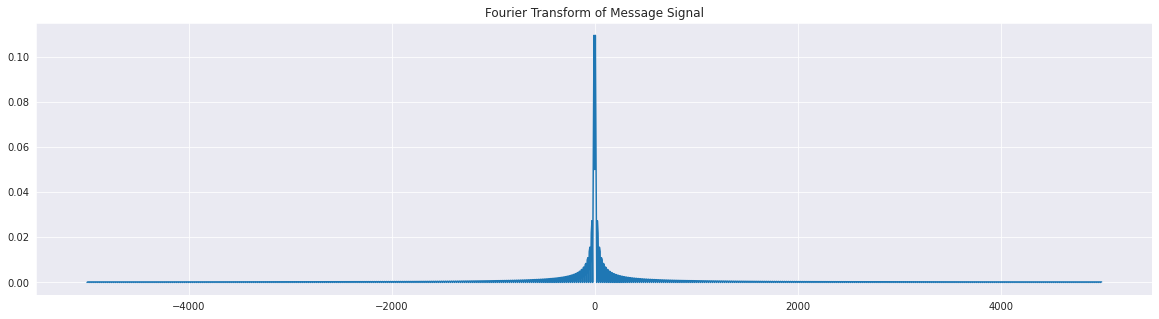

In [10]:
xs = scipy.fft.fftfreq(len(msg_signal), 0.0001)
ys = [np.abs(item) * 0.0001 for item in scipy.fft.fft(msg_signal['Message Signal m(t)'].values)]
plt.figure(figsize = (20, 5))
sns.lineplot(x = xs, y = ys)
plt.title('Fourier Transform of Message Signal')
plt.show()

###Frequency Spectrum of Frequency Modulated Signal

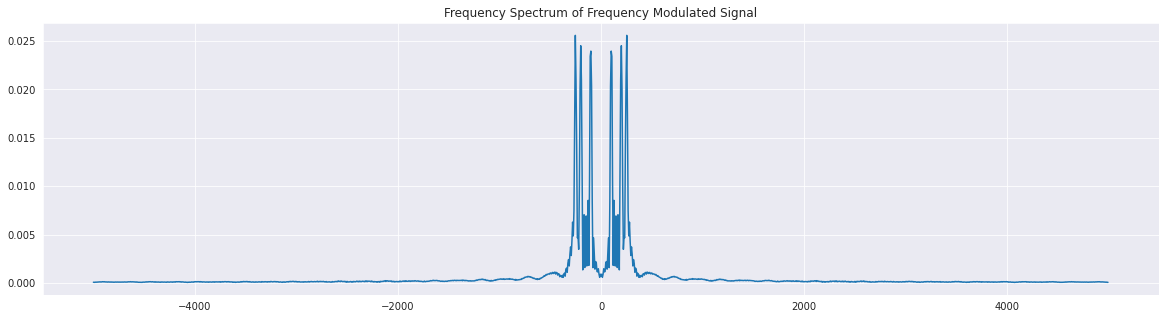

In [11]:
xs = scipy.fft.fftfreq(len(fm_signal), 0.0001)
ys = [np.abs(item) * 0.0001 for item in scipy.fft.fft(fm_signal['FM Signal'].values)]
plt.figure(figsize = (20, 5))
sns.lineplot(x = xs, y = ys)
plt.title('Frequency Spectrum of Frequency Modulated Signal')
plt.show()